# Project 1 – Maximum Likelihood Parameter Estimation

**Reference:**  
G. Cowan, *Statistical Data Analysis*, Section 6.8  
“Example of Maximum Likelihood with Two Parameters”

---

This project concerns the estimation of the parameters of a probability distribution using the Maximum Likelihood (ML) method. The data are assumed to be independent measurements drawn from a Gaussian (normal) distribution with unknown mean and standard deviation.


## 1. Problem Description

We are given a set of independent measurements:


$$
x_1, x_2, \dots, x_N
$$


The measurements are assumed to be affected by random noise and to follow a Gaussian distribution with unknown parameters:

- mean ( $\mu$\)
- standard deviation \( $\sigma$)

The goal of this project is to estimate the parameters ( $\mu$ ) and ( $\sigma$) using the Maximum Likelihood method and to interpret the results.


## 2. Gaussian Probability Model

A single measurement \( x \) is modeled as being drawn from a Gaussian distribution:
$$
f(x \mid \mu, \sigma)
=
\frac{1}{\sqrt{2\pi}\,\sigma}
\exp\left(
-\frac{(x-\mu)^2}{2\sigma^2}
\right)
$$

where:
- ( $\mu$) represents the true value of the measured quantity,
- ( $\sigma$ ) represents the strength of the measurement noise.


## 3. Likelihood Function

Since the measurements are independent, the likelihood function for the full dataset is given by the product of the individual probabilities:

$$
L(\mu, \sigma)
=
\prod_{i=1}^{N}
f(x_i \mid \mu, \sigma)
$$

In practice, it is more convenient to work with the logarithm of the likelihood, which transforms products into sums.


## 4. Maximum Likelihood Estimation

The Maximum Likelihood estimates of the parameters are obtained by maximizing the log-likelihood function with respect to $\mu$ and $\sigma$.

For Gaussian data, this procedure leads to the following estimators:

$$
\hat{\mu}
=
\frac{1}{N}
\sum_{i=1}^{N} x_i
$$

$$
\hat{\sigma}^2
=
\frac{1}{N}
\sum_{i=1}^{N}
\left(x_i - \hat{\mu}\right)^2
$$

These correspond to the sample mean and the sample variance (in the Maximum Likelihood formulation).


## 5. Experimental Data

The dataset is provided as an external text file containing one measurement per line.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt("data_ML.txt")

N = len(data)
N


200

## 6. Maximum Likelihood Estimates


In [9]:
N = len(data)

mu_hat = np.mean(data)
sigma_hat = np.sqrt(np.mean((data - mu_hat)**2))

import pandas as pd

results = pd.DataFrame(
    {
        "Estimate": [mu_hat, sigma_hat],
    },
    index=[r"$\hat{\mu}$", r"$\hat{\sigma}$"]
)

results



,Estimate
$\hat{\mu}$,0.226276
$\hat{\sigma}$,0.532194


## 7. Data Visualization and Model Comparison

The histogram of the data is shown together with the Gaussian distribution corresponding to the Maximum Likelihood estimates.


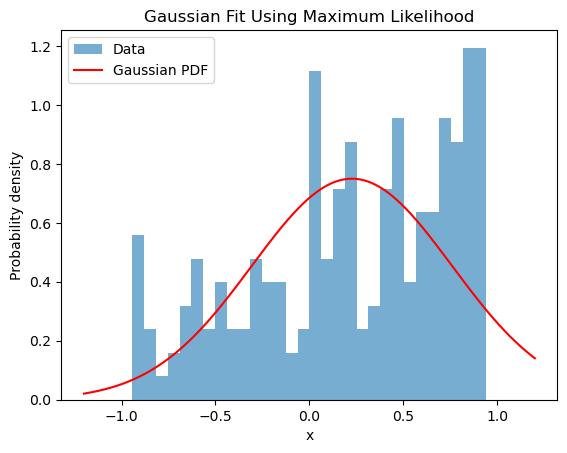

In [11]:
x = np.linspace(-1.2, 1.2, 400)

gaussian = (
    1 / (np.sqrt(2*np.pi)*sigma_hat)
    * np.exp(-(x - mu_hat)**2 / (2*sigma_hat**2))
)

plt.hist(data, bins=30, density=True, alpha=0.6, label="Data")
plt.plot(x, gaussian, 'r', label="Gaussian PDF")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()
plt.title("Gaussian Fit Using Maximum Likelihood")
plt.show()

The histogram is normalized to unit area (density=True) in order to represent a probability density and allow direct comparison with the Gaussian probability density function.


## 8. Interpretation of Results

The Maximum Likelihood estimate of the mean is:

$$
\hat{\mu} \approx 0.23
$$

This indicates that the measurements are centered around a positive value, slightly above zero. The fact that the estimated mean is not exactly zero is expected, as it reflects the finite size of the dataset and the presence of random fluctuations.

The estimated standard deviation is:

$$
\hat{\sigma} \approx 0.53
$$

which quantifies the typical size of the measurement noise. This value is consistent with the observed spread of the data, which extend roughly over the interval \([-1, 1]\).

The histogram of the data shows a reasonably symmetric distribution around the estimated mean, and the Gaussian probability density function obtained from the Maximum Likelihood estimates provides a satisfactory description of the overall shape of the data.


## 9. Conclusion

In this project, the Maximum Likelihood method was applied to estimate the parameters of a Gaussian distribution from a set of independent experimental measurements.

The estimated mean indicates that the data are centered around a positive value, while the estimated standard deviation provides a quantitative measure of the intrinsic measurement noise.

Assuming a Gaussian probability model, the Maximum Likelihood estimates provide a parametric description of the central tendency and spread of the data. This example illustrates the application of Maximum Likelihood estimation with two parameters, in accordance with the discussion presented in Cowan, Section 6.8.
